# Interpretability examples

## Setup code

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Duplicated from the nonparametrics notes
N_test = 500
N_train = 150

np.random.seed(2021)

# Create a training dataset
x1_train = np.random.uniform(-1, 1, N_train)
x2_train = np.random.uniform(-1, 1, N_train)

y_train = (x1_train * x2_train > 0).astype(np.int64)

# Create a feature matrix that we can use for classification
X_train = np.vstack([x1_train, x2_train]).transpose()


# Create a test dataset
x1_test = np.random.uniform(-3, 3, N_test)
x2_test = np.random.uniform(-3, 3, N_test)

y_test = (x1_test * x2_test > 0).astype(np.int64)

# Create a feature matrix that we can use to evaluate
X_test = np.vstack([x1_test, x2_test]).transpose()

def draw_results(x1, x2, color, plot_title=''):
    plt.figure()
    plt.scatter(x1, x2, c=color, cmap='viridis', alpha=0.7);
    plt.colorbar()
    plt.title(plot_title)
    plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


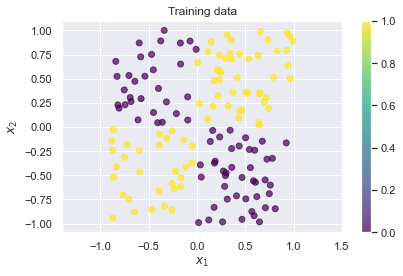

In [3]:
draw_results(x1_train, x2_train, color=y_train, plot_title='Training data')
#draw_results(x1_test, x2_test, color=y_test, plot_title='Test data (ground truth)')

## Logistic regression

Define $p$ as $P(y = 1)$. Then logistic regression says:

$$
p = \sigma(\beta_1 x_1 + \beta_2 x_2) \\
\underbrace{\log\left(\frac{p}{1-p}\right)}_{\text{logit: inverse sigmoid}} = \beta_1 x_1 + \beta_2 x_2
$$

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


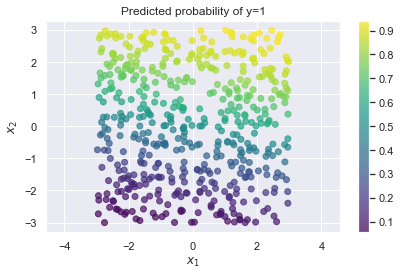

In [4]:
from sklearn.linear_model import LogisticRegression

# Create and fit a scikit-learn logistic regression model on training set
model_logistic = LogisticRegression(penalty='none', solver='lbfgs')
model_logistic.fit(X_train, y_train)

# Use the model to predict on the test set
probs = model_logistic.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


# Visualize the results
draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

In [5]:
model_logistic.coef_

array([[0.14617069, 0.80642215]])

## Logistic regression with feature engineering

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


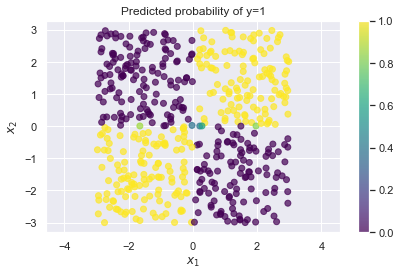

In [6]:
from sklearn.linear_model import LogisticRegression
# Create a new feature: x1 * x2
def add_mult_feature(X):
    """Returns an array like X, but with a new feature that's X1 * X2"""
    new_feature = X[:, 0] * X[:, 1]
    return np.hstack([X, new_feature[:, None]])


X_train_feat = add_mult_feature(X_train)
X_test_feat = add_mult_feature(X_test)

# Create and fit a scikit-learn logistic regression model on training set
model_logistic_feat_eng = LogisticRegression(penalty='none', solver='lbfgs')

model_logistic_feat_eng.fit(X_train_feat, y_train)

# Use the model to predict on the test set
probs = model_logistic_feat_eng.predict_proba(X_test_feat)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


# Visualize the results
draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

In [7]:
model_logistic_feat_eng.coef_

array([[ -15.7502901 ,    1.76614945, 1720.58615787]])

## Logistic regression on a real dataset

This example uses the breast cancer dataset from lectures 3-4.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
dataset = load_breast_cancer()
X = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset['target']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

cancer_model = LogisticRegression(solver = "liblinear")
cancer_model.fit(X_train_bc, y_train_bc)
y_hat_test = cancer_model.predict(X_test_bc)

In [9]:
pd.DataFrame({'feature': dataset['feature_names'], 'coefficient': cancer_model.coef_.flat})

,feature,coefficient
0,mean radius,2.096500
1,mean texture,0.204405
2,mean perimeter,-0.135540
3,mean area,-0.003224
4,mean smoothness,-0.102060
5,mean compactness,-0.383573
6,mean concavity,-0.573512
7,mean concave points,-0.282636
8,mean symmetry,-0.164713
9,mean fractal dimension,-0.027331


## k-NN

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Accuracy on training set: 0.95


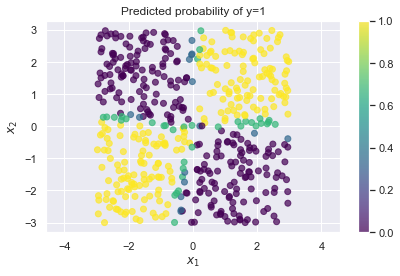

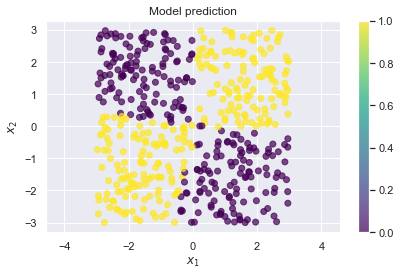

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

probs = model_knn.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

draw_results(
    x1_test, x2_test, color=y_hat, 
    plot_title="Model prediction"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

## Decision tree: clean data

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Accuracy on training set: 0.996


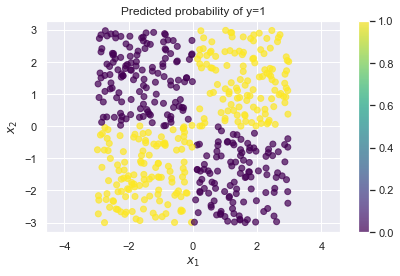

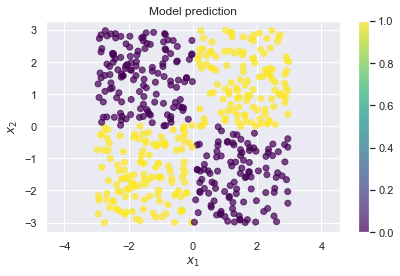

In [11]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

probs = model_tree.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1"
)

draw_results(
    x1_test, x2_test, color=y_hat, 
    plot_title="Model prediction"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

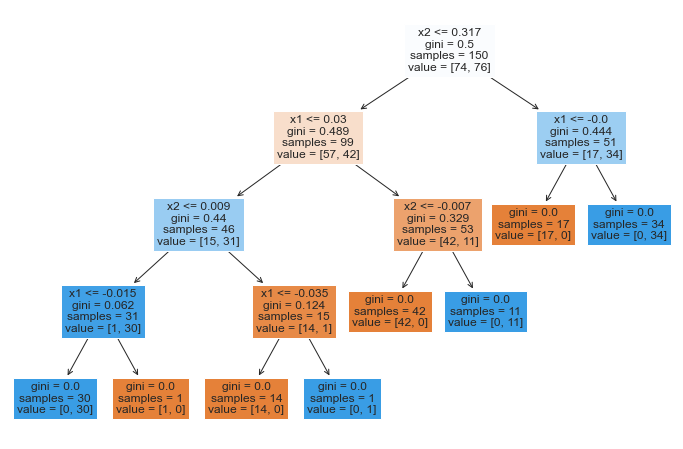

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model_tree, fontsize=12, filled=True, feature_names=['x1', 'x2']);

## Decision tree: noisy data

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


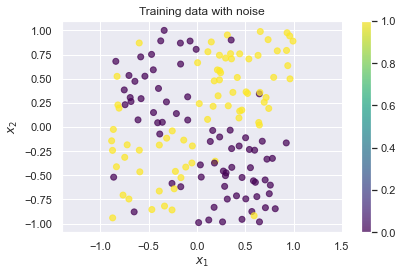

In [13]:
y_train_noisy = y_train.copy()

pts_to_flip = np.random.random(N_train) < 0.1
y_train_noisy[pts_to_flip] = 1 - y_train_noisy[pts_to_flip]

draw_results(x1_train, x2_train, color=y_train_noisy, plot_title='Training data with noise')

/var/folders/tj/sf2pp9mj67d62tbnsw2gjhbw0000gn/T/ipykernel_22396/4076474482.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Accuracy on training set: 0.962


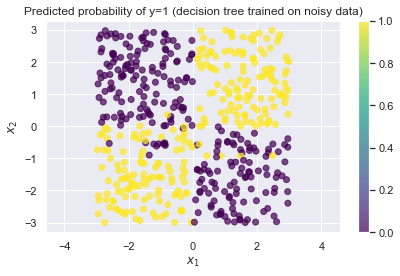

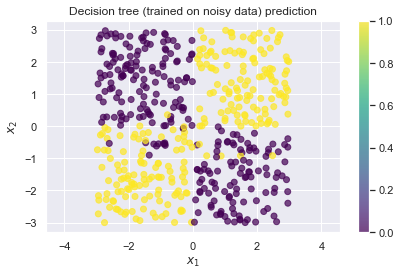

In [14]:
from sklearn.tree import DecisionTreeClassifier

noisy_tree = DecisionTreeClassifier()
noisy_tree.fit(X_train, y_train_noisy)

probs = noisy_tree.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs, 
    plot_title="Predicted probability of y=1 (decision tree trained on noisy data)"
)

draw_results(
    x1_test, x2_test, color=y_hat, 
    plot_title="Decision tree (trained on noisy data) prediction"
)

accuracy = np.mean(y_test == y_hat)
print(f"Accuracy on training set: {accuracy}")

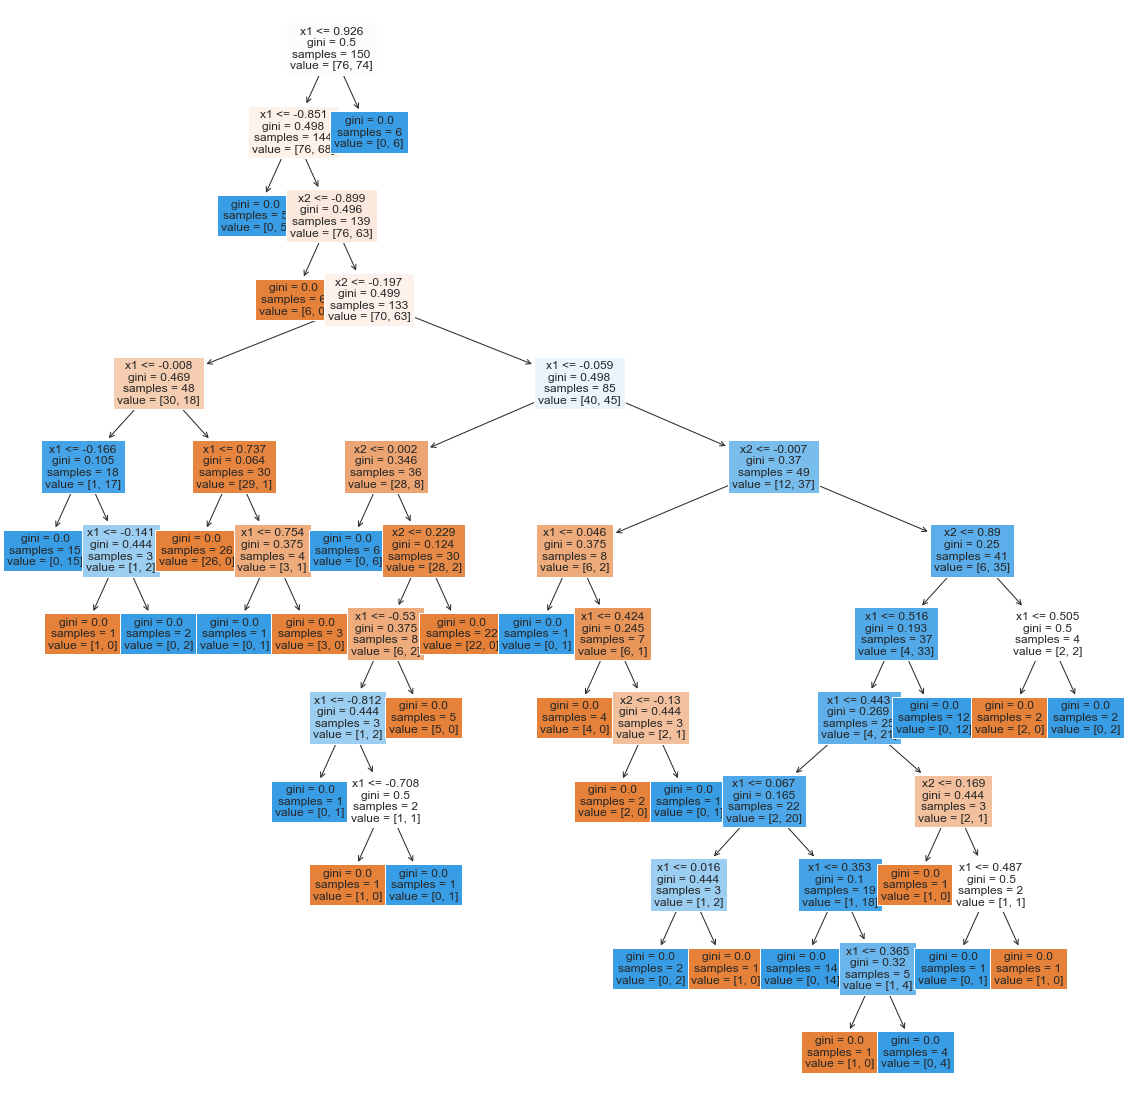

In [58]:

plt.figure(figsize=(20, 20))
plot_tree(noisy_tree, fontsize=12, filled=True, feature_names=['x1', 'x2']);